# Project: Wrangling and Analyze Data

#Table of Contents
1. ## Data Gathering
2. ## Assessing Data
3. ## Cleaning Data
4. ## Storing Data
5. ## Analyzing and Visualizing Data
6. ### Insights

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import requests
import os
import json
import seaborn as sns
%matplotlib inline

folder_name = 'new folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [3]:
image_prediction = pd.read_csv('image-predictions.tsv', delimiter ='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
with open ('tweet_json.txt', 'r', encoding = 'utf-8') as file:
    lines = file.readlines()
status = []
for line in lines:
    data = json.loads(line)
    tweet_id = data['id']
    favorite_count = data['favorite_count']
    retweet_count = data['retweet_count']
    status.append({'tweet_id': tweet_id, 'favorite_count': favorite_count, 'retweet_count': retweet_count})


In [5]:
status

[{'tweet_id': 892420643555336193,
  'favorite_count': 39467,
  'retweet_count': 8853},
 {'tweet_id': 892177421306343426,
  'favorite_count': 33819,
  'retweet_count': 6514},
 {'tweet_id': 891815181378084864,
  'favorite_count': 25461,
  'retweet_count': 4328},
 {'tweet_id': 891689557279858688,
  'favorite_count': 42908,
  'retweet_count': 8964},
 {'tweet_id': 891327558926688256,
  'favorite_count': 41048,
  'retweet_count': 9774},
 {'tweet_id': 891087950875897856,
  'favorite_count': 20562,
  'retweet_count': 3261},
 {'tweet_id': 890971913173991426,
  'favorite_count': 12041,
  'retweet_count': 2158},
 {'tweet_id': 890729181411237888,
  'favorite_count': 56848,
  'retweet_count': 16716},
 {'tweet_id': 890609185150312448,
  'favorite_count': 28226,
  'retweet_count': 4429},
 {'tweet_id': 890240255349198849,
  'favorite_count': 32467,
  'retweet_count': 7711},
 {'tweet_id': 890006608113172480,
  'favorite_count': 31166,
  'retweet_count': 7624},
 {'tweet_id': 889880896479866881,
  'favor

In [6]:
tweet = pd.DataFrame(status)
tweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
#checking dataset visually 
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
#checking dataset programmatically
twitter_archive.info()
sum(twitter_archive.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

0

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#checking data set visually 
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
#checking the dataset programmatically 
image_prediction.info()
sum(image_prediction.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


0

In [12]:
#checking dataset visually 
tweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [13]:
#checking dataset programmatically 
tweet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. 'Twitter_Archive' timestamp is an object instead of being datetime format

2. 'twitter_Archive' Rating Numerator has maximum value of 1776

3. 'twitter_Archive' Rating Denominator has maximum value of 170

4. 'image_prediction' predictions p1, p2 and p3 sometimes contain '_' in the predictions
 
5. 'image_prediction' predictions p1, p2 and p3 sometimes start with capital letter and other times start with small letters

6. 'twitter_Archive' source column contains html elements 

7. 'some of the tweets are retweeted. we only need original tweets.

8. twitter_archive contains columns such as retweet_id which are unnecessary 


### Tidiness issues
1. Tweet data frame should be part of the twitter_archive dataframe

2. Dog stage is divided into three different columns instead of one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [14]:
# Make copies of original pieces of data
twitter_archive_new = twitter_archive.copy()
image_prediction_new = image_prediction.copy()
tweet_new = tweet.copy()

### Issue #1:

#### Define: The timestamp column is an object instead of date-time

#### Code

In [15]:
twitter_archive_new['timestamp'] = pd.to_datetime(twitter_archive_new.timestamp)

#### Test

In [16]:
twitter_archive_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:

#### Define twitter_archive rating numerator has maximum value of 1776

#### Code

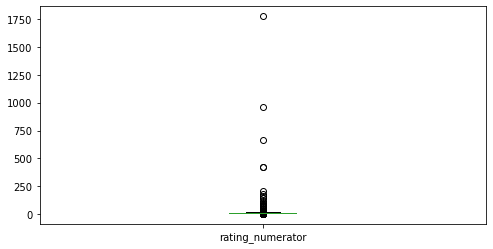

In [17]:
twitter_archive_new['rating_numerator'].plot(kind ='box', figsize = (8,4));

In [18]:
new = twitter_archive_new.query('rating_numerator >= 250')
new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [19]:
index = [188,189,313,979, 2074]
twitter_archive_new = twitter_archive_new.drop(labels = index)

In [20]:
twitter_archive_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue 3

'twitter_Archive' Rating Denominator has maximum value of 170

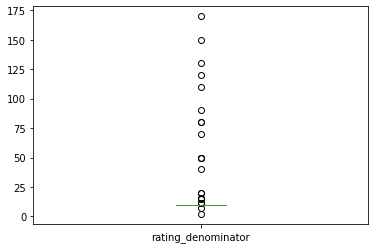

In [21]:
twitter_archive_new.rating_denominator.plot(kind ='box')

In [22]:
twitter_archive_new = twitter_archive_new[twitter_archive_new.rating_denominator == 10]



#### Test

In [23]:
twitter_archive_new.rating_denominator.describe()

count    2329.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [24]:
twitter_archive_new

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##Issue 4

'image_prediction' predictions p1, p2 and p3 sometimes contain '_' in the predictions

In [25]:
#using str.replace to remove "_" with space
image_prediction_new.p1 = image_prediction.p1.str.replace('_', ' ')
image_prediction_new.p2 = image_prediction.p2.str.replace('_', ' ')
image_prediction_new.p3 = image_prediction.p3.str.replace('_', ' ')

In [26]:
#checking to see changes have been reflected
image_prediction_new.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##Issue 5 
## 'image_prediction' predictions p1, p2 and p3 sometimes start with capital letter and other times start with small letters 

In [27]:
image_prediction_new.p1 = image_prediction.p1.str.lower()
image_prediction_new.p2 = image_prediction.p2.str.lower()
image_prediction_new.p3 = image_prediction.p3.str.lower()

In [28]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##Issue #6
"twitter_Archive' source column contains html elements

In [29]:
twitter_archive_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [30]:
twitter_archive_new.source = twitter_archive_new.source.str[9:-1] 

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
twitter_archive_new.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### issue 7
some of the tweet are retweeted 

In [32]:
#selecting the rows with retweets and droping them from the archive dataset
retweet = twitter_archive_new.query('retweeted_status_id != "NaN"')
twitter_archive_new.drop(retweet.index, inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
#cheking to see the rows have been dropped 
twitter_archive_new.shape

(2149, 17)

### Issue #8
twitter_archive contains columns such as retweet_id which are unnecessary

In [34]:
twitter_archive_new.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [35]:
#checking to see the columns have been dropped 
twitter_archive_new.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##Tidiness issue 

###issue 1 
tweet_new should be part of the twitter archive

In [36]:
#use the pandas merge function to joint the two dataframes
twitter_archive_new = twitter_archive_new.merge(tweet_new, on='tweet_id', how ='inner')
twitter_archive_new = twitter_archive_new.merge(image_prediction_new, on='tweet_id', how ='inner')

In [37]:
twitter_archive_new.shape

(1974, 25)

### issue #2 
 dog stage is divided into three columns instead of one 

In [38]:
twitter_archive_new.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

In [39]:
twitter_archive_new.doggo.replace('None','', inplace = True)
twitter_archive_new.floofer.replace('None','', inplace = True)
twitter_archive_new.pupper.replace('None','', inplace = True)
twitter_archive_new.puppo.replace('None','', inplace = True)
twitter_archive_new


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,...,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True
1970,666044226329800704,2015-11-16 00:04:52+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,...,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
1971,666033412701032449,2015-11-15 23:21:54+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,...,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1972,666029285002620928,2015-11-15 23:05:30+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True


In [40]:
#creating a new column from the four columns with the dog stage
twitter_archive_new['dog_stage'] = twitter_archive_new.doggo + twitter_archive_new.floofer + twitter_archive_new.pupper + twitter_archive_new.puppo

In [58]:
#Dropping the four columns
twitter_archive_new.drop(['doggo','floofer','pupper', 'puppo'], axis= 1, inplace = True)

In [64]:
#formatting the new column 
twitter_archive_new.query('dog_stage =="doggopupper"')
twitter_archive_new.loc[twitter_archive_new.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper' 
#df_1_clean.loc[df_1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
#df_1_clean.loc[df_1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [65]:
twitter_archive_new.query('dog_stage =="doggopuppo"')
twitter_archive_new.loc[twitter_archive_new.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo' 


In [66]:
twitter_archive_new.query('dog_stage =="doggofloofer"')
twitter_archive_new.loc[twitter_archive_new.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer' 


In [67]:
twitter_archive_new

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,744234799360020481,2016-06-18 18:26:18+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,131075,79515,...,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,doggo
1,807106840509214720,2016-12-09 06:17:20+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,107015,56625,...,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True,
2,739238157791694849,2016-06-04 23:31:25+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,75163,52360,...,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True,doggo
3,822872901745569793,2017-01-21 18:26:02+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,132810,48265,...,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,puppo
4,879415818425184262,2017-06-26 19:07:24+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,107956,45849,...,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,111,41,...,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,
1970,666268910803644416,2015-11-16 14:57:41+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10,10,None,108,37,...,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,
1971,668291999406125056,2015-11-22 04:56:43+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",I can't do better than he did. 10/10 https://t...,https://twitter.com/dog_rates/status/668291999...,10,10,None,264,34,...,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False,
1972,666447344410484738,2015-11-17 02:46:43+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,107,23,...,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,labrador_retriever,0.166331,True,


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [42]:
twitter_archive_new.to_csv('twitter_archive_master', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [43]:
#How often is the first prediction of the algorithm a dog type
p1_correct = twitter_archive_new.query('p1_dog == True')
print(p1_correct.p1_dog.value_counts())
frq_correct = (p1_correct.p1_dog.value_counts()/twitter_archive_new.p1_dog.value_counts()) *100
frq_correct


True    1462
Name: p1_dog, dtype: int64


False      NaN
True     100.0
Name: p1_dog, dtype: float64

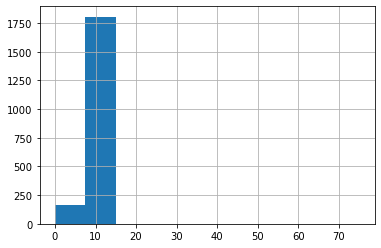

In [44]:
#checking the distribution of the numerators of the dog ratings
twitter_archive_new.rating_numerator.hist()

In [45]:
#checking the numerators lower than 10
twitter_archive_new.query('rating_numerator <10').count()

tweet_id              410
timestamp             410
source                410
text                  410
expanded_urls         410
rating_numerator      410
rating_denominator    410
name                  410
doggo                 410
floofer               410
pupper                410
puppo                 410
favorite_count        410
retweet_count         410
jpg_url               410
img_num               410
p1                    410
p1_conf               410
p1_dog                410
p2                    410
p2_conf               410
p2_dog                410
p3                    410
p3_conf               410
p3_dog                410
dog_stage             410
dtype: int64

In [46]:
# total value of datapoints in the dataset
twitter_archive_new.count()

tweet_id              1974
timestamp             1974
source                1974
text                  1974
expanded_urls         1974
rating_numerator      1974
rating_denominator    1974
name                  1974
doggo                 1974
floofer               1974
pupper                1974
puppo                 1974
favorite_count        1974
retweet_count         1974
jpg_url               1974
img_num               1974
p1                    1974
p1_conf               1974
p1_dog                1974
p2                    1974
p2_conf               1974
p2_dog                1974
p3                    1974
p3_conf               1974
p3_dog                1974
dog_stage             1974
dtype: int64

In [47]:
#determining the percentage of rating with numerator less than 10
low_numerator = 410/1974 *100
low_numerator

20.77001013171226

In [48]:
#sorting the datafram in order of the highest number of retweet 
twitter_archive_new.sort_values('retweet_count', ascending = False, inplace = True, ignore_index = True)
twitter_archive_new

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,744234799360020481,2016-06-18 18:26:18+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,,...,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,doggo
1,807106840509214720,2016-12-09 06:17:20+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,,,...,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True,
2,739238157791694849,2016-06-04 23:31:25+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,,...,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True,doggo
3,822872901745569793,2017-01-21 18:26:02+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,,,...,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,puppo
4,879415818425184262,2017-06-26 19:07:24+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,,,...,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,666049248165822465,2015-11-16 00:24:50+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,...,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,
1970,666268910803644416,2015-11-16 14:57:41+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Very concerned about fellow dog trapped in com...,https://twitter.com/dog_rates/status/666268910...,10,10,None,,,...,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False,
1971,668291999406125056,2015-11-22 04:56:43+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",I can't do better than he did. 10/10 https://t...,https://twitter.com/dog_rates/status/668291999...,10,10,None,,,...,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False,
1972,666447344410484738,2015-11-17 02:46:43+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Scout. She is a black Downton Abbey. I...,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,,,...,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,labrador_retriever,0.166331,True,


In [49]:
#retuning the top 10 tweets with the highest number of retweets
twitter_archive_newtop10 = twitter_archive_new.nlargest(10, 'retweet_count')
twitter_archive_newtop10


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,744234799360020481,2016-06-18 18:26:18+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,,...,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,doggo
1,807106840509214720,2016-12-09 06:17:20+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,,,...,chihuahua,0.505370,True,pomeranian,0.120358,True,toy_terrier,0.077008,True,
2,739238157791694849,2016-06-04 23:31:25+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13,10,None,doggo,,...,eskimo_dog,0.503372,True,siberian_husky,0.390413,True,malamute,0.080901,True,doggo
3,822872901745569793,2017-01-21 18:26:02+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,,,...,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,puppo
4,879415818425184262,2017-06-26 19:07:24+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,,,...,english_springer,0.383404,True,boston_bull,0.134967,True,cardigan,0.110481,True,
5,819004803107983360,2017-01-11 02:15:36+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,,...,standard_poodle,0.351308,True,toy_poodle,0.271929,True,tibetan_terrier,0.094759,True,doggo
6,806629075125202948,2016-12-07 22:38:52+00:00,"http://twitter.com/download/iphone"" rel=""nofol...","""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13,10,None,,,...,arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,
7,761672994376806400,2016-08-05 21:19:27+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10,10,None,,,...,gondola,0.318851,False,sea_lion,0.306525,False,pool_table,0.111565,False,
8,866450705531457537,2017-05-22 00:28:40+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,,,...,french_bulldog,0.905334,True,boston_bull,0.078060,True,pug,0.001771,True,pupper
9,676219687039057920,2015-12-14 01:58:31+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10,10,Kenneth,,,...,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True,


In [50]:
#total number of retweets for the top 10 retweeted posts 
print(twitter_archive_newtop10.retweet_count.sum())
#total number of retweets from all posts 
print(twitter_archive_new.retweet_count.sum())
# calculating the percentage of retweet from the top 10 retweeted posts
top10 = (twitter_archive_newtop10.retweet_count.sum()/twitter_archive_new.retweet_count.sum()*100)
top10

461046
5464989


8.436357328441101

In [51]:
twitter_archive_new.columns


Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'dog_stage'],
      dtype='object')

In [52]:
#cheking descriptibe statistics of the favourite counts
twitter_archive_new.favorite_count.describe()

count      1974.000000
mean       8923.220871
std       12254.875184
min          81.000000
25%        1956.250000
50%        4136.000000
75%       11355.250000
max      132810.000000
Name: favorite_count, dtype: float64

In [53]:
twitter_archive_new.query('favorite_count ==132810')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
3,822872901745569793,2017-01-21 18:26:02+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,,,...,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True,puppo


In [54]:
twitter_archive_new.query('favorite_count == 81')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1973,666102155909144576,2015-11-16 03:55:04+00:00,"http://twitter.com/download/iphone"" rel=""nofol...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,10,None,,,...,english_setter,0.298617,True,newfoundland,0.149842,True,borzoi,0.133649,True,


### Insights:
1. Although the numerator for the dog ratings are usually higher than 10, about 20.77% are lower than 10. 

2. only 10 post account for about 8.45% of all retweets from the page 

3. the post with the most favorite count had 132,810 favorites and was posted on 21th jan, 2017 while the post with the minimum 
    favorite count was posted on 16th November 2015 with 81 favorites. 

### Visualization

<BarContainer object of 10 artists>

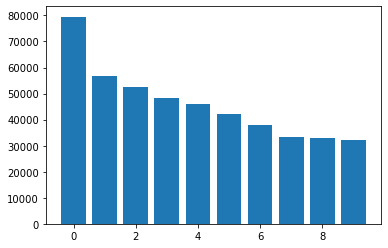

In [55]:
#bar chart showing the number of retweet
plt.bar(data = twitter_archive_newtop10, x = twitter_archive_newtop10.index, height='retweet_count')